# Importing important libraries for EDA

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from warnings import filterwarnings
filterwarnings("ignore")

# Reading dataset

In [39]:
data = pd.read_csv("loan_approval_dataset.csv")

In [40]:
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [10]:
data.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [12]:
data.duplicated().sum()

0

In [13]:
data.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

# Striping space from the column names

In [41]:
data.columns = list(data.columns.str.strip())

In [42]:
data.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

# Numerical and categorical columns segregation

In [43]:
num_col = data.select_dtypes(include='number').columns.to_list()
cat_col = data.select_dtypes(exclude='number').columns.to_list()

# checking for outliers

<h4 style="color: red;">histogram and kde ploting of all numerical features</h4>

Skewness of loan_id: 0.0
Skewness of no_of_dependents: -0.01797054296784964
Skewness of income_annum: -0.012814425096650109
Skewness of loan_amount: 0.30872388482299223
Skewness of loan_term: 0.036358907356478495
Skewness of cibil_score: -0.009039277330065707
Skewness of residential_assets_value: 0.9784505965115631
Skewness of commercial_assets_value: 0.9577908874986114
Skewness of luxury_assets_value: 0.3222075028955774
Skewness of bank_asset_value: 0.5607250089736816


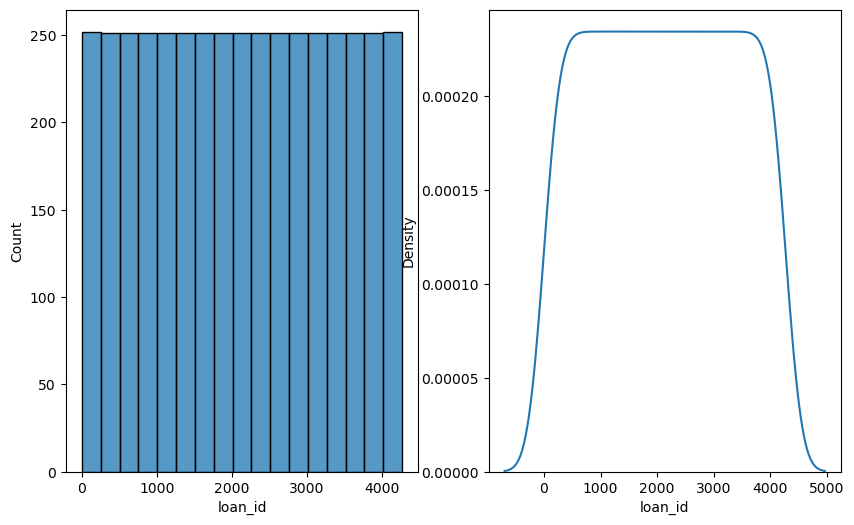

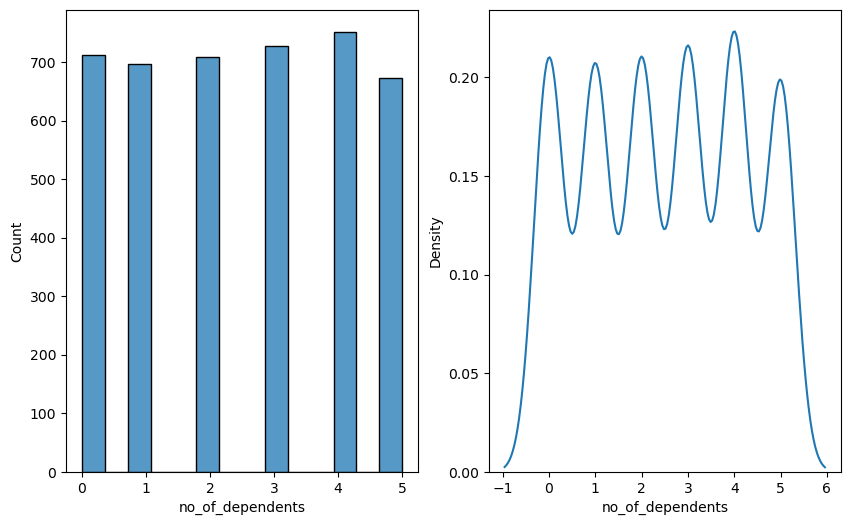

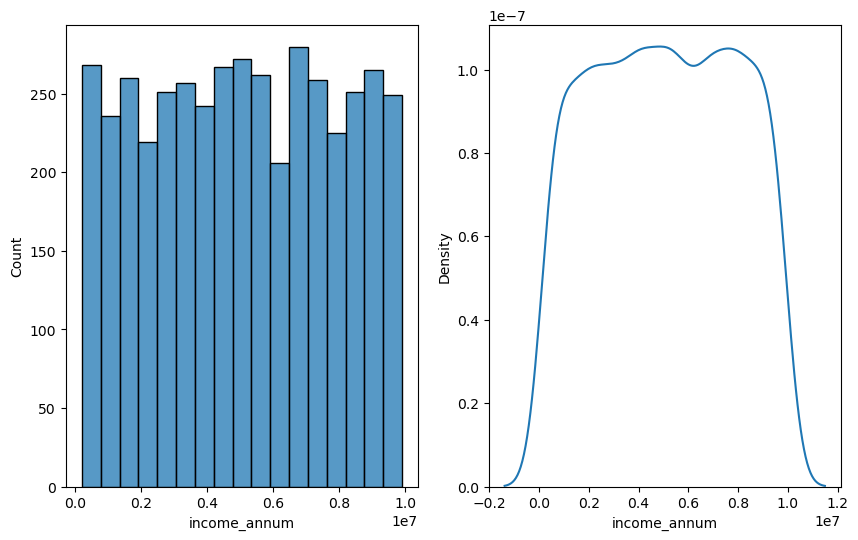

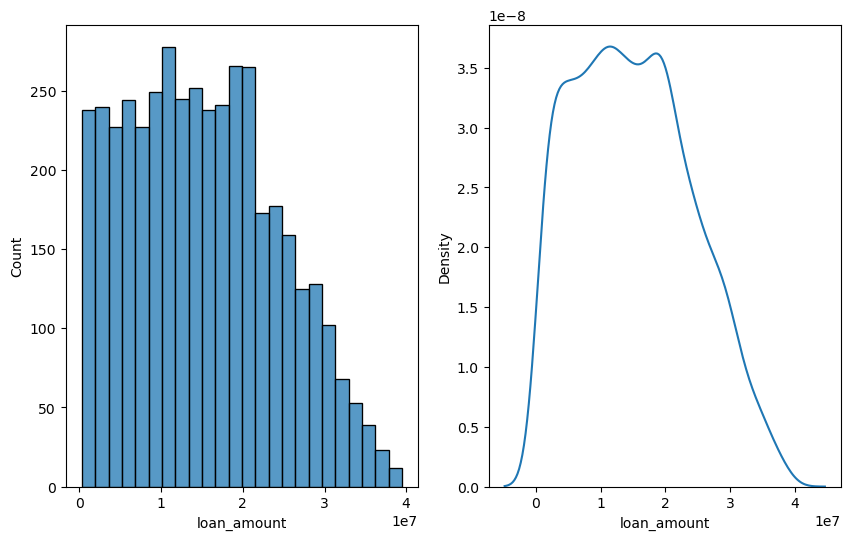

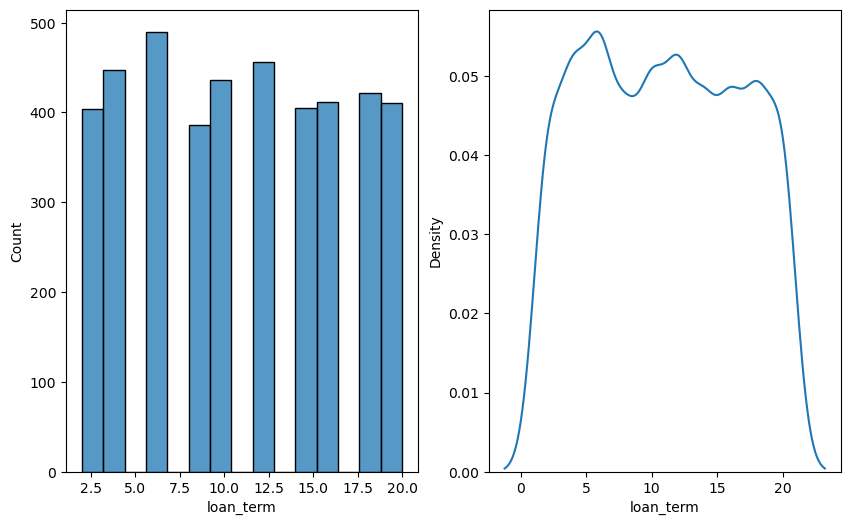

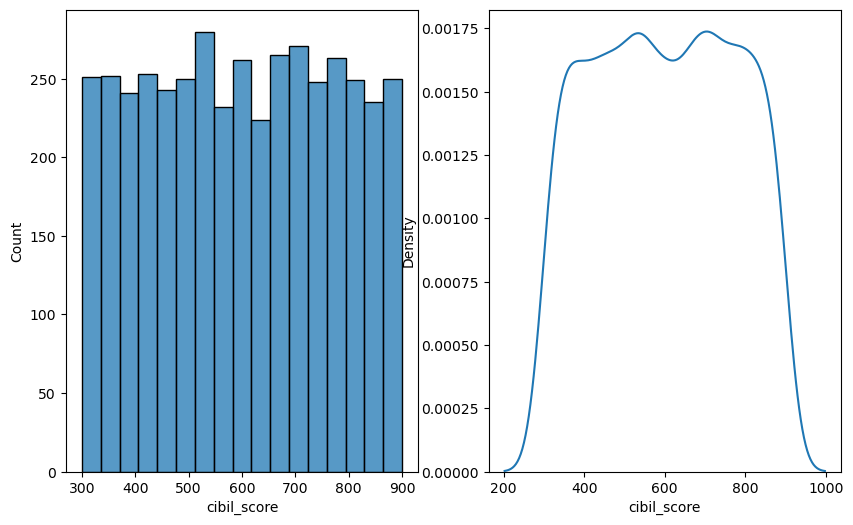

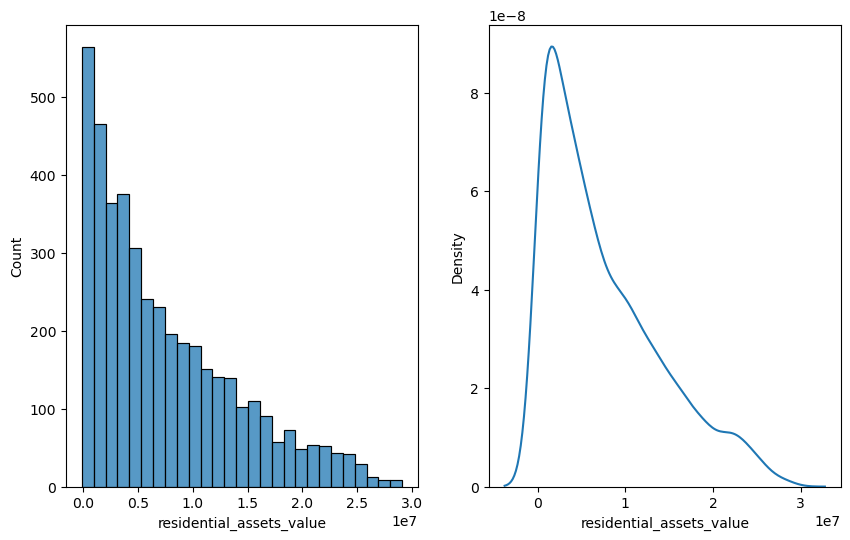

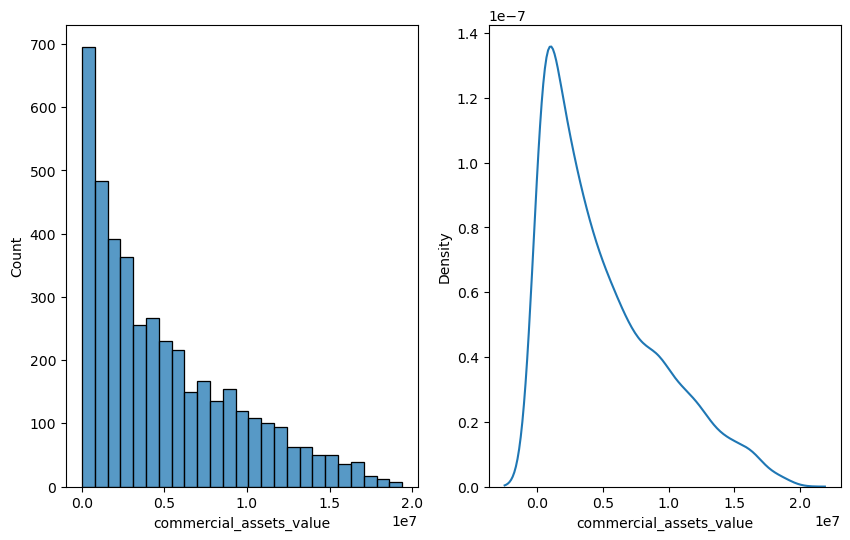

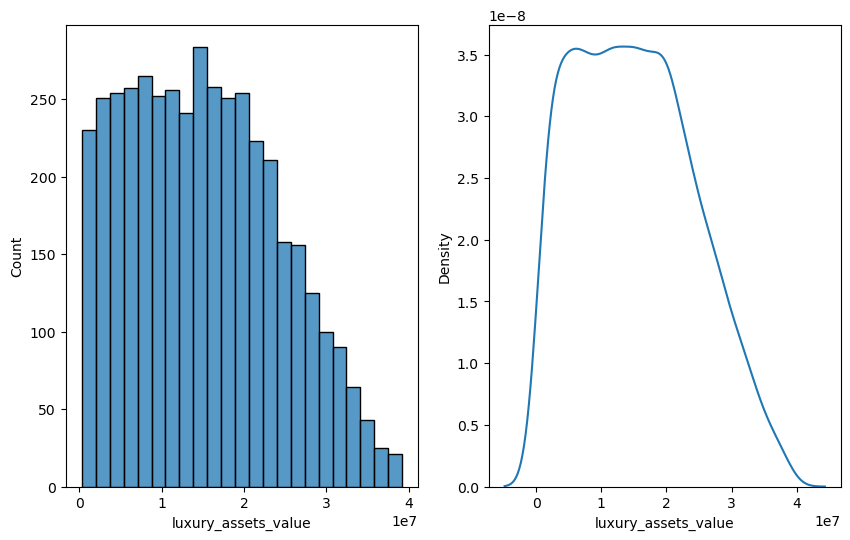

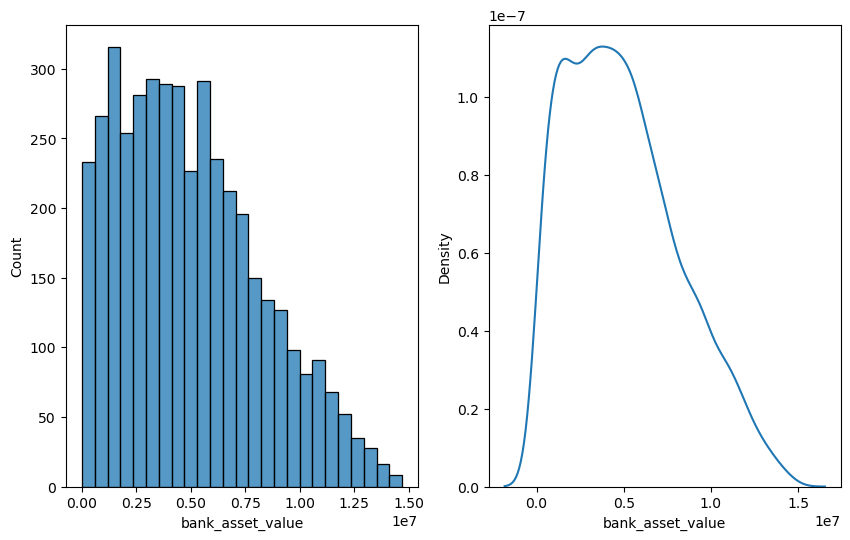

In [22]:
for col in num_col:
    fig,ax= plt.subplots(1,2,figsize=(10,6))

    sns.histplot(data[col], kde=False ,ax=ax[0])
    sns.kdeplot(data[col],ax=ax[1])

    print(f"Skewness of {col}: {data[col].skew()}")

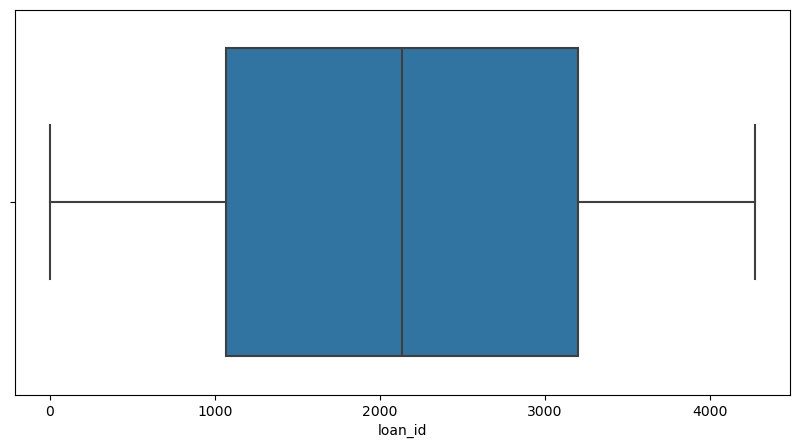

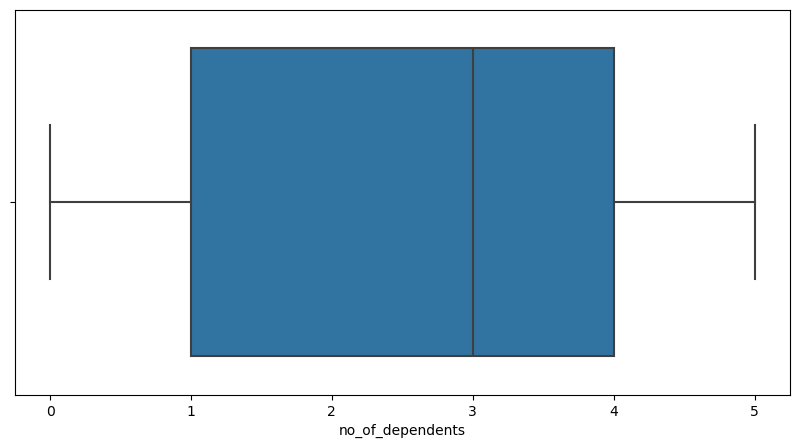

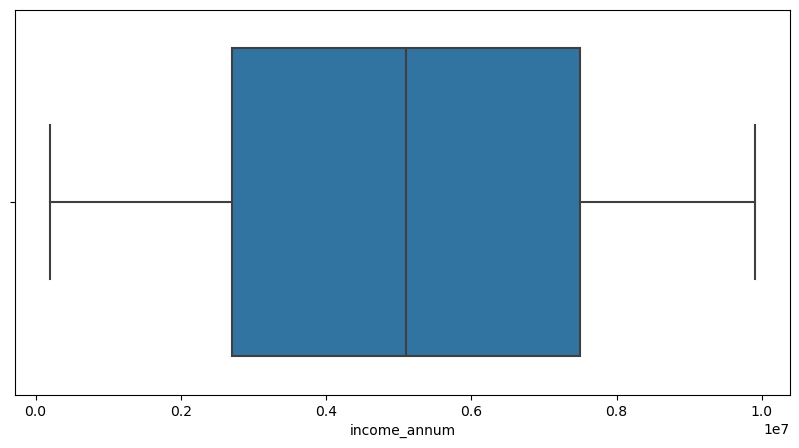

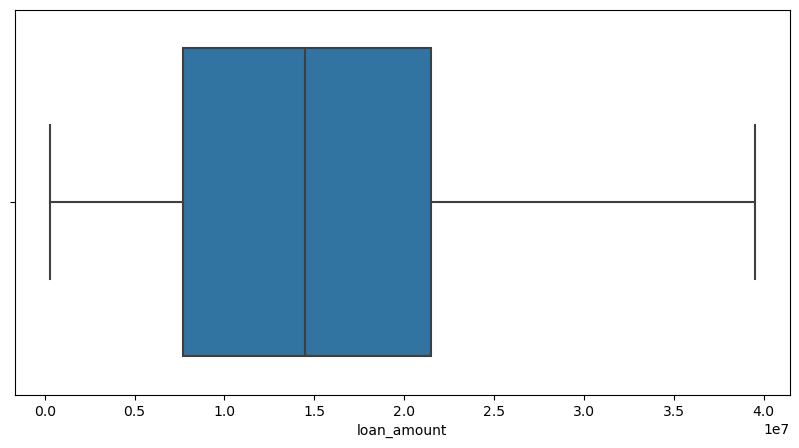

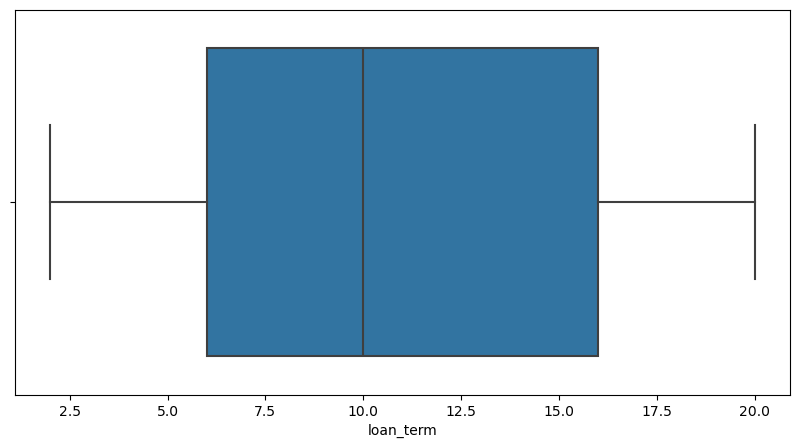

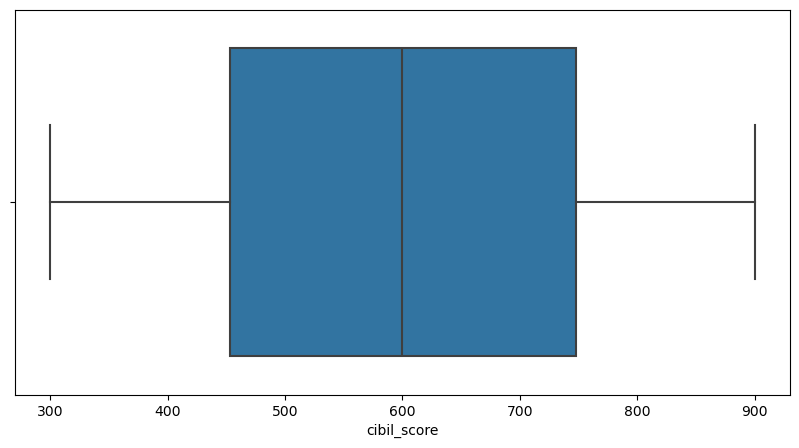

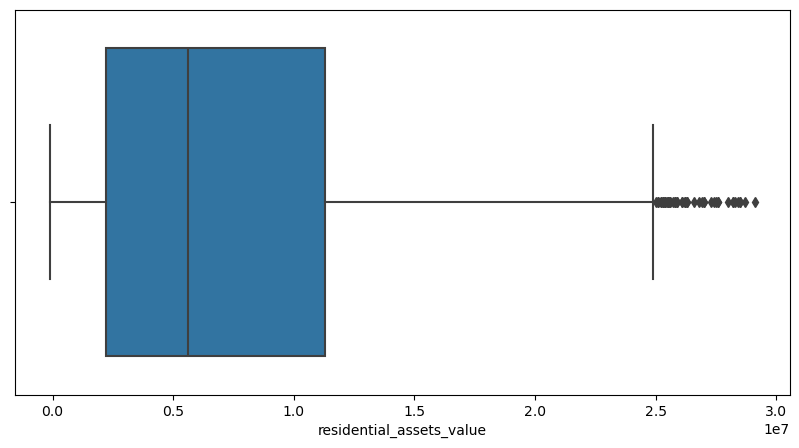

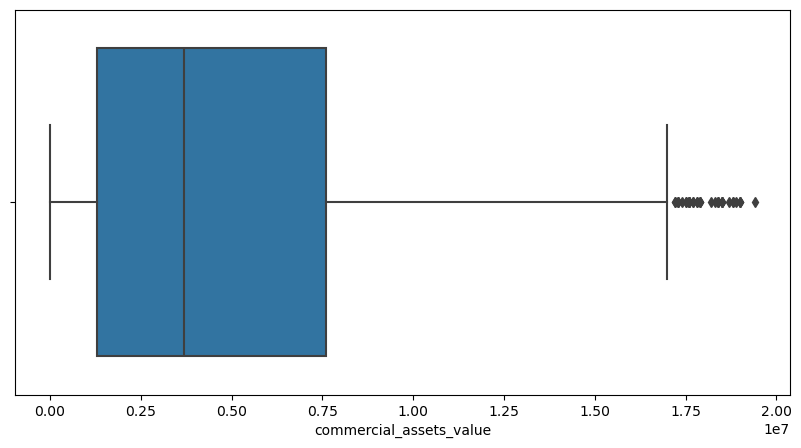

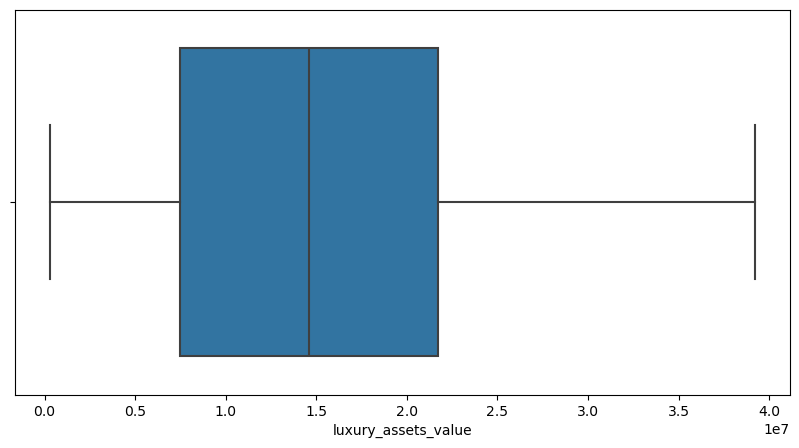

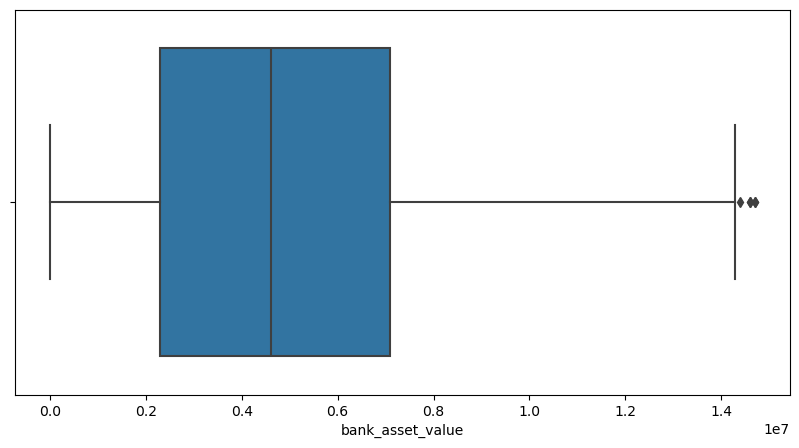

In [44]:
for col in num_col:
    plt.figure(figsize=(10,5))
    sns.boxplot(data, x= col)

In [24]:
num_col

['loan_id',
 'no_of_dependents',
 'income_annum',
 'loan_amount',
 'loan_term',
 'cibil_score',
 'residential_assets_value',
 'commercial_assets_value',
 'luxury_assets_value',
 'bank_asset_value']

In [45]:
outlier_col = ['residential_assets_value','commercial_assets_value','bank_asset_value']

In [29]:
print("gfdghafjahfdgklsdjglfdkhlgjl;kghl;kl\
sdhgfhjsgkjfdhsaglkdjflk")

gfdghafjahfdgklsdjglfdkhlgjl;kghl;klsdhgfhjsgkjfdhsaglkdjflk


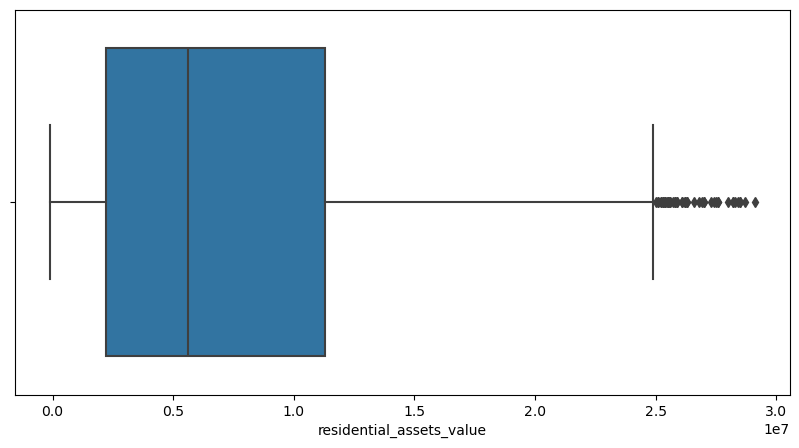

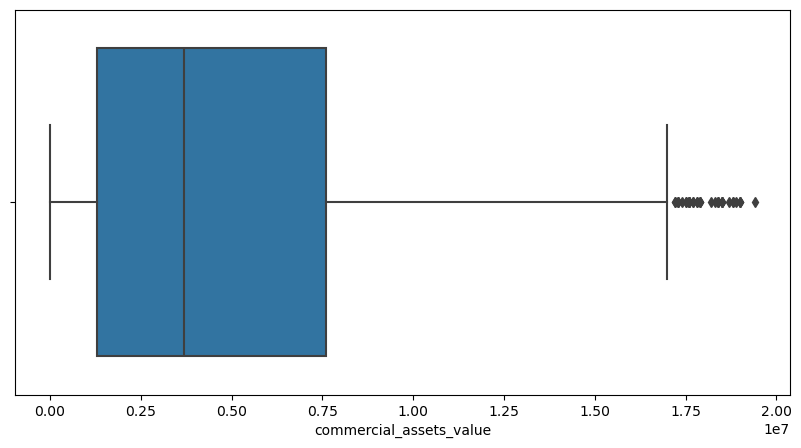

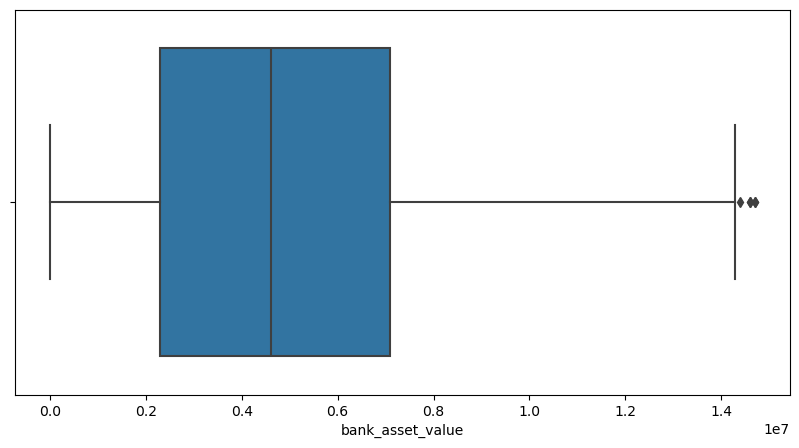

In [46]:
for col in outlier_col:
    plt.figure(figsize=(10,5))
    sns.boxplot(data, x= col)

In [32]:
data[outlier_col].describe().T

,count,mean,std,min,25%,50%,75%,max
residential_assets_value,4269.0,7.472617e+06,6.503637e+06,-100000.0,2200000.0,5600000.0,11300000.0,29100000.0
commercial_assets_value,4269.0,4.973155e+06,4.388966e+06,0.0,1300000.0,3700000.0,7600000.0,19400000.0
bank_asset_value,4269.0,4.976692e+06,3.250185e+06,0.0,2300000.0,4600000.0,7100000.0,14700000.0


In [47]:
for col in outlier_col:
    data[col] = data[col]/10000

In [48]:
data[outlier_col].describe().T

,count,mean,std,min,25%,50%,75%,max
residential_assets_value,4269.0,747.261654,650.363659,-10.0,220.0,560.0,1130.0,2910.0
commercial_assets_value,4269.0,497.315531,438.896609,0.0,130.0,370.0,760.0,1940.0
bank_asset_value,4269.0,497.669243,325.018531,0.0,230.0,460.0,710.0,1470.0


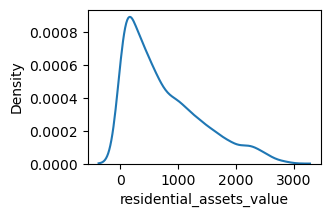

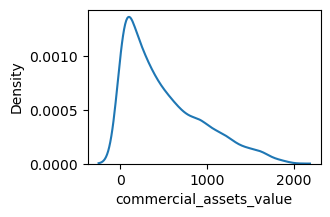

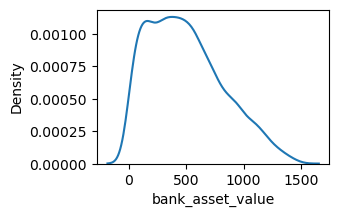

In [49]:
for col in outlier_col:
    plt.figure(figsize=(3,2))
    sns.kdeplot(data[col])

# Handling Outliers

# Handle Outliers:
- Removal: You can choose to remove the data points that are identified as outliers.

- Transformation: You can apply transformations to the data to reduce the impact of outliers (e.g., log transformation).

- Capping: You can cap the extreme values at a certain threshold.

- Imputation: You can replace outliers with more representative values (e.g., mean, median) if appropriate.

# Outlier Detection using Boundary Values
- Boundary Values
(mean (+or-) 3*std_dev)

In [51]:
for col in outlier_col:
    print(f'Upper Boundary Value for {col} : {round(data[col].mean()+3*data[col].std(),0)}')
    print(f'Lower Boundary Value for {col} : {data[col].mean()-3*data[col].std()}')
    print("*"*80)

Upper Boundary Value for residential_assets_value : 2698.0
Lower Boundary Value for residential_assets_value : -1203.829322516142
********************************************************************************
Upper Boundary Value for commercial_assets_value : 1814.0
Lower Boundary Value for commercial_assets_value : -819.3742963223152
********************************************************************************
Upper Boundary Value for bank_asset_value : 1473.0
Lower Boundary Value for bank_asset_value : -477.38634832618567
********************************************************************************


In [52]:
def upper_lower_limit(col):
    upper_limit=round(data[col].mean()+3*data[col].std(),0)
    lower_limit=round(data[col].mean()-3*data[col].std(),0)
    return upper_limit,lower_limit

In [53]:
outlier_col

['residential_assets_value', 'commercial_assets_value', 'bank_asset_value']

In [54]:
rav_upper,rav_lower=upper_lower_limit('residential_assets_value')

In [60]:
rav_index=data[(data['residential_assets_value']>rav_upper)|(data['residential_assets_value']<rav_lower)].index

In [61]:
rav_index

Index([ 714,  892,  905,  987, 1468, 1591, 1965, 1997, 2318, 2586, 2927, 3119,
       3234, 3782, 4042, 4074],
      dtype='int64')

In [59]:
df = data.copy()

In [62]:
df.shape

(4269, 13)

In [63]:
trim_rav = df.drop(rav_index,axis=0)

In [64]:
trim_rav.shape

(4253, 13)

<Axes: xlabel='residential_assets_value'>

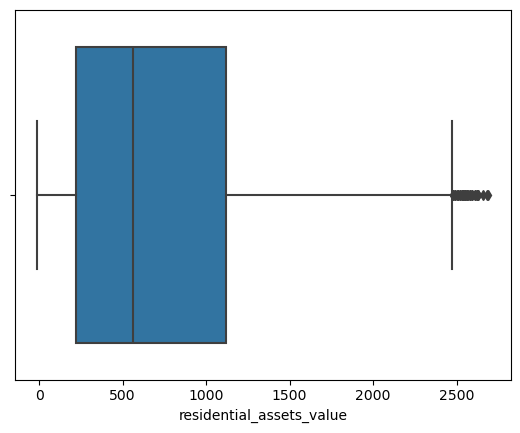

In [65]:
sns.boxplot(trim_rav,x='residential_assets_value')

In [66]:
l = [1,2,4,7,10,20,100,1000,2000]

In [67]:
cav_upper,cav_lower=upper_lower_limit('commercial_assets_value')

In [68]:
cav_index=data[(data['commercial_assets_value']>cav_upper)|(data['commercial_assets_value']<cav_lower)].index

In [73]:
cav_index

Index([ 157,  258,  367,  554,  895, 1029, 1254, 1272, 1304, 1761, 1768, 2914,
       2940, 3000, 3439, 3790, 3882],
      dtype='int64')

In [70]:
trim_cav = df.drop(cav_index,axis=0)

In [71]:
trim_cav.shape

(4252, 13)

<Axes: xlabel='commercial_assets_value'>

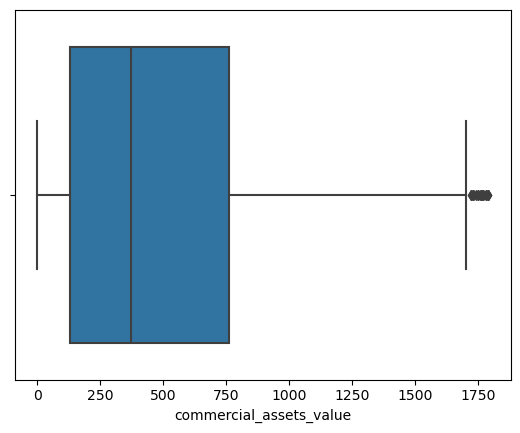

In [74]:
sns.boxplot(trim_cav,x='commercial_assets_value')

In [75]:
bav_upper,bav_lower=upper_lower_limit('bank_asset_value')

In [77]:
bav_index=data[(data['bank_asset_value']>bav_upper)|(data['bank_asset_value']<bav_lower)].index

In [80]:
bav_index

Index([], dtype='int64')